In [ ]:
"""
확률적 경사 하강법

점진적인 학습 또는 온라인 학습

점진적 학습 알고리즘은 확률적 경사 하강법

----
확률적 경사 하강법

여러개의 샘플을 사용해 경사 하강법을 수행하는 방식을 미니배치 경사 하강법

전체 샘플을 사용해 경사 하강법을 수행하는 방식을 배치 경사 하강법

----
손실함수

비용 함수는 손실 함수의 다른말

손실 함수는 미분이 가능해야함

----
로지스틱 손실 함수

이진분류일 때
양성클래스(타깃 = 1)일때 손실은 -log(예측 확률)로 계산함
확률이 1에서 멀어질수록 손실은 아주 큰 양수가 됨
음성 클래스(타깃=0)일때 손실은 -log(1-예측 확률)로 계산함
이 예측 확률이 0에서 멀어질수록 손실은 아주 큰 양수가 됨

이 손실 함수를 로지스틱 손실 함수, 또는 이진 크로스엔트로피 손실 함수

다중 분류도 비슷한 손실 함수를 사용함
다중 분류에서 사용하는 손실 함수를 크로스엔트로피 손실 함수 

이진 분류는 로지스틱 손실 함수
다중 분류는 크로스엔트로피 손실 함수 

회귀의 손실함수로는 평균 절대값 오차 , 또는 평균 제곱 오차를 사용함

----
확률적 경사 하가법을 사용한 분류 모델을 생성
"""


In [1]:
"""
SGDClassifier
fish_csv_data 파일에서 판다스 데이터프레임 생성
"""
import pandas as pd
fish = pd.read_csv("https://bit.ly/fish_csv_data")

In [2]:
"""
Species 열을 제외한 나머지 5개는 입력 데이터로 사용
Species 열은 타깃 데이터(라벨 데이터)
"""
fish_input = fish[["Weight", "Length", "Diagonal","Height", "Width"]].to_numpy()
fish_target = fish["Species"].to_numpy()

In [3]:
"""
사이킷런의 train_test_split()함수를 사용
훈련 세트와 테스트 세트로 나눔
"""
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
fish_input, fish_target, random_state=42)

In [4]:
"""
훈련 세트와 테스트 세트의 특성을 
표준화 전처리 
훈련 세트에서 학습한 통계 값으로 테스트 세트도 변환 해야함
"""
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled =ss.transform(test_input)

In [5]:
"""
사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스는
SGDClassifier 
sklearn.linear_model 패키지 아래에서 임포트
"""
from sklearn.linear_model import SGDClassifier

In [6]:
"""
SGDClassifier의 객체를 만들 때 2개의 매개변수를 지정함
loss는 손실 함수의 종류를 지정
여기에서는 loss="log"로 지정하여 로지스틱 손실 함수를 지정
max_iter 수행할 에포크 횟수를 지정

----
다중 분류일 경우 SGDClassifier에 logg="log"로 지정하면 클래스마다 이진 분류 모델을 만듬
즉 도미를 양성 클래스로 두고 나머지를 모두 음성 클래스로 두고 모델을 만드는 식
이런 방식을 OvR(One versus Rest)라고 부름
"""
sc = SGDClassifier(loss="log", max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


c:\programdata\anaconda3\envs\tensor1\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [7]:
"""
Convergence 경고가 나타나는 이유 - max_iter를 충분히 늘리기 않아서 그럼
여기서는 실습을 계속 진행
----
확률적 경사 하강법은 점진적 학습이 가능함 
SGDClassifier 객체를 다시 만들지 않고 훈련한 모델sc를 추가로 더 훈련
모델을 이어서 훈련할 때는 partial_fit()메서드 사용

partial_fit()메서드를 호출하고 다시 훈련 세트와 테스트 세트의 점수 확인
"""
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [ ]:
"""
이 훈련은 train_scaled와 train_target을 한꺼번에 모두 사용했으니 확률적 경사 하강법이 아닌 배치 경사 하강법 아닌가요? 아닙니다!
SGDClassifier 객체에 한번에 훈련 세트 전체를 전달했지만 이 알고리즘은 전달한 훈련 세트에서 1개씩 샘플을 꺼내어
경사 하강법 단계를 수행함
SGDClassifier는 미니배치 경사 하강법이나 배치 하강법을 제공하지 않다
"""

In [8]:
"""
에포크와 과대/과소적합

확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다

과대적합이 시작하기 전에 훈련을 멈추는 것을 조기 종료라고 함

예시-
"""
import numpy as np
sc = SGDClassifier(loss="log", random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

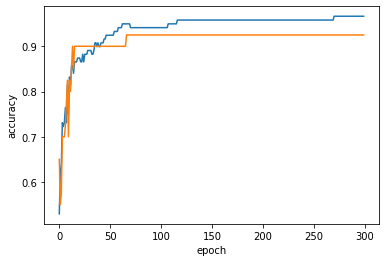

In [9]:
"""
훈련 세트와 테스트 세트의 점수를 그래프로 그림

100번째 에포크 이후에는 훈련 세트와 테스트 세트의 점수가 조금씩 벌어지는 모습
"""
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [10]:
"""
SGDClassifier의 반복 횟수를 100에 맞추고 모델을 다시 훈련

SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춤
tol 매개변수에서 향상될 최솟값을 지정함
tol 매개변수를 None으로 지정하여 자동으로 멈추지 않고 max_iter=100 만큼 무조건 반복
"""
sc = SGDClassifier(loss="log", max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [12]:
"""
SGDClassifier의 loss 매개변수 
loss 매개변수의 기본값은 "hinge" - 힌지 손실은 서포트 벡터 머신이라 불리는 
또 다른 머신러닝 알고리즘을 위한 손실 함수임

서포트 벡터 머신이 널리 사용하는 머신러닝 알고리즘 중 하나라는 점과 SGDClassifier가 
여러 종류의 손실 함수를 loss 매개변수에 지정하여 
다양한 머신 러닝 알고리즘을 지원한다는 것
"""
sc = SGDClassifier(loss="hinge", max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
